In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from PIL import Image
import random

import torch
import torchvision.transforms as T

from dataloader import DatasetMNIST, tensor2img
from trainer import train_model

# 디바이스 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

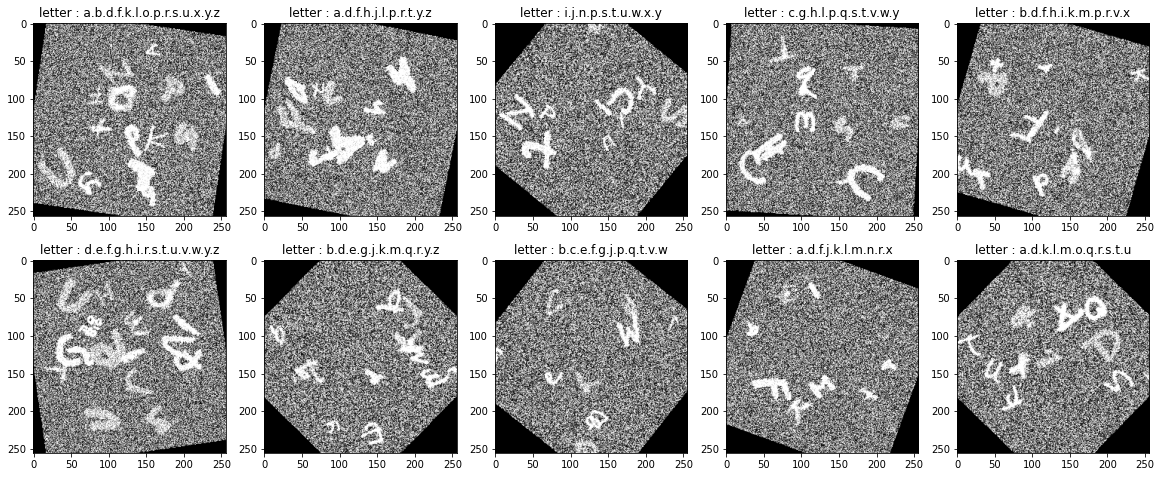

In [2]:
# path setup
root = os.path.join(os.getcwd(), 'dirty_mnist')
train_path = os.path.join(root, 'train')
dirty_mnist_answer = pd.read_csv(os.path.join(root, "dirty_mnist_2nd_answer.csv"))

datasets = DatasetMNIST(train_path + '/', meta_df=dirty_mnist_answer, mode='train')

decoder_l = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
               'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

# sample 이미지 보기
fig, ax = plt.subplots(2, 5, figsize=(5*4, 2*4))
for i, data in enumerate(datasets):
    if i == 10:
        break
    img, label = data['image'], data['label']
    row = i // 5
    col = i % 5
    ax[row, col].imshow(tensor2img(img))
    ax[row, col].set_title("letter : {}".format(".".join([decoder_l[ii] for ii, k in enumerate(label) if k == 1.])))
plt.show()

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [8]:
from resnet50 import Resnet
from efficientNet import mnistEfficient

BAGGING_NUM = 1
BATCH_SIZE = 16
flod_num = 4

# 모델을 학습하고, 최종 모델을 기반으로 테스트 데이터에 대한 예측 결과물을 저장하는 도구 함수이다
def train_and_predict(cfg_dict):
    cfg = cfg_dict.copy()
    cfg['bagging_num'] = BAGGING_NUM
    cfg['fold_num'] = flod_num
    print("training ")
    # 모델을 학습
    train_model(**cfg)

# # ResNet 모델 학습 설정값
# res_config = {
#     'model_class': Resnet,
#     'is_1d': False,
#     'reshape_size': None,
#     'BATCH_SIZE': BATCH_SIZE,
#     'epochs': 60,
#     'lr' : 1e-3,
#     'CODER': 'resnet',
#     'DatasetMNIST' : DatasetMNIST,
#     'dirty_mnist_answer' : dirty_mnist_answer,
# }
# seed_everything(np.random.randint(1, 5000))
# print("train resnet.........")
# train_and_predict(res_config)


# Eff 모델 학습 설정값
eff_config = {
    'model_class': mnistEfficient,
    'is_1d': False,
    'reshape_size': None,
    'BATCH_SIZE': BATCH_SIZE,
    'epochs': 30,
    'lr' : 1e-3,
    'CODER': 'efficient',
    'DatasetMNIST' : DatasetMNIST,
    'dirty_mnist_answer' : dirty_mnist_answer,
}
seed_everything(np.random.randint(1, 5000))
print("train efficientNet.........")
train_and_predict(eff_config)

train efficientNet.........
training 
bagging num :  0
[fold: 1]
Loaded pretrained weights for efficientnet-b6
--------------------------------------------------


Train Epoch 0:   0%|                                | 0/2344 [00:29<?, ?batch/s]


RuntimeError: CUDA out of memory. Tried to allocate 56.00 MiB (GPU 0; 8.00 GiB total capacity; 390.83 MiB already allocated; 6.07 GiB free; 410.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF